<h1>Energy Consumption</h1>

<h2>Notes</h2>

In [1]:
#Population is the number you see in the row multiplies by 1000

#Energy intensity—calculated as total energy consumption divided by real 
#gross domestic product (GDP)—is a common energy indicator and 
#efficiency measure. Measured in BTU's

#Electric power consumption per capita (kWh ) is the production of power 
#plants and combined heat and power plants less transmission, 
#distribution, and transformation losses and own use by heat and 
#power plants, divided by midyear population. Measured in kWh

#Energy production refers to how much primary energy a country extracts 
#from nature. This is the total of all of the harvested primary fuels 
#and primary energy flows. Note production ignores both imports and exports,
#and sums up what's extracted from nature.

<h2>Questions</h2>

- Keep these questions in mind when looking into the dataset 

In [2]:
#Questions:
#Does population affect how much energy is consumed

<h2>Articles</h2>

- This is used to show if what you are doing is matching up by what is being reported in real life.

In [3]:
#Articles
#Mexicos Oil Production Declining since 2004
#https://www.eia.gov/international/analysis/country/MEX

#President Obrador sees future in non-renewables than renewables
#https://www.nytimes.com/es/2022/08/17/espanol/mexico-petroleo-amlo-pemex.html#:~:text=the%20main%20story-,M%C3%A9xico%20apuesta%20su%20futuro%20energ%C3%A9tico%20al%20petr%C3%B3leo%2C%20no%20a%20las,los%20objetivos%20clim%C3%A1ticos%20de%20M%C3%A9xico.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

In [4]:
dataset = pd.read_csv('energy.csv')

In [5]:
list(dataset['Country'].unique())

['World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo-Brazzaville',
 'Congo-Kinshasa',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Côte d’Ivoire',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'Former Czechos

In [6]:
mexico_df = dataset[dataset.Country == 'Mexico']

In [7]:
mexico_df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
798,798,Mexico,all_energy_types,1980,3.801224,5.713649,984.750,67967.05,55.927459,3.860091,NaN
799,799,Mexico,coal,1980,0.088556,0.065223,984.750,67967.05,55.927459,3.860091,NaN
800,800,Mexico,natural_gas,1980,0.843744,0.950400,984.750,67967.05,55.927459,3.860091,NaN
801,801,Mexico,petroleum_n_other_liquids,1980,2.680407,4.514688,984.750,67967.05,55.927459,3.860091,NaN
802,802,Mexico,nuclear,1980,NaN,NaN,984.750,67967.05,55.927459,3.860091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
54853,54853,Mexico,coal,2019,0.416173,0.207908,2384.142,127745.80,62.518639,3.349840,45.109508
54854,54854,Mexico,natural_gas,2019,3.019191,0.985764,2384.142,127745.80,62.518639,3.349840,154.494922
54855,54855,Mexico,petroleum_n_other_liquids,2019,3.794168,3.994546,2384.142,127745.80,62.518639,3.349840,256.543908
54856,54856,Mexico,nuclear,2019,0.109517,0.109517,2384.142,127745.80,62.518639,3.349840,0.000000


In [ ]:
corr_matrix = mexico_df.corr()

In [9]:
#Looking at the correlation matrix for Energy_consumption we can see 
#that CO2_emission, Energy_production are the two that affect it the most
#but I would want to take a look at the GDP, Year and Population as well

<h1>Correlation Matrix</h1>

In [10]:
corr_matrix['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
CO2_emission                   0.991656
Energy_production              0.938915
GDP                            0.152733
Year                           0.152501
Unnamed: 0                     0.152438
Population                     0.152073
Energy_intensity_per_capita    0.127606
Energy_intensity_by_GDP       -0.110423
Name: Energy_consumption, dtype: float64

<h2>Corr Cols</h2>

array([[<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_consumption'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Population', ylabel='CO2_emission'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_production'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Population'>,
        <AxesSubplot:xlabel='CO2_emiss

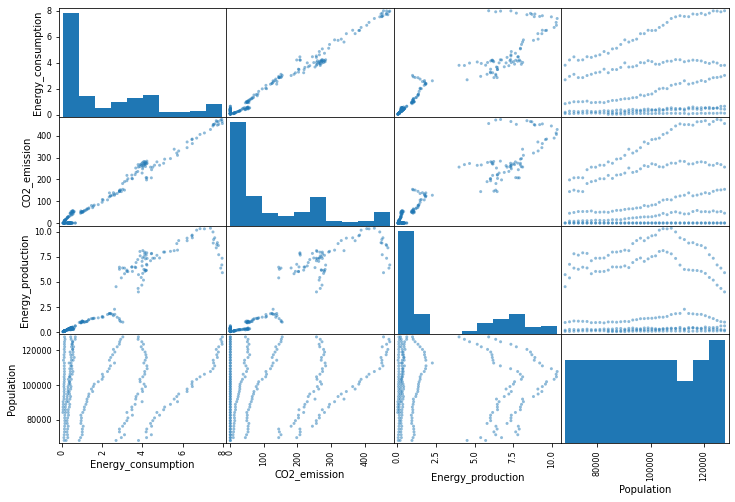

In [11]:
cols = ['Energy_consumption','CO2_emission', 'Energy_production', 'Population']
scatter_matrix(mexico_df[cols], figsize=(12, 8))

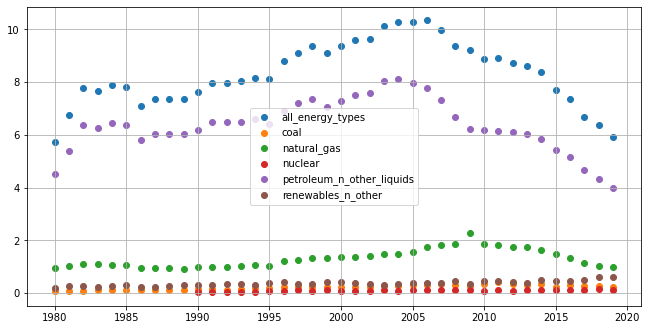

In [12]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))

for a,(b,c) in enumerate(mexico_df.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_production, label = b)
    
axes.legend()
axes.grid(True)
plt.show()

<h1>Pie Charts</h1>

<h2>2019 Energy consumption</h2>

In [13]:
year_2019 = mexico_df[mexico_df.Year == 2019]

In [14]:
year_2019

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
54852,54852,Mexico,all_energy_types,2019,7.986494,5.909857,2384.142,127745.8,62.518639,3.34984,456.148338
54853,54853,Mexico,coal,2019,0.416173,0.207908,2384.142,127745.8,62.518639,3.34984,45.109508
54854,54854,Mexico,natural_gas,2019,3.019191,0.985764,2384.142,127745.8,62.518639,3.34984,154.494922
54855,54855,Mexico,petroleum_n_other_liquids,2019,3.794168,3.994546,2384.142,127745.8,62.518639,3.34984,256.543908
54856,54856,Mexico,nuclear,2019,0.109517,0.109517,2384.142,127745.8,62.518639,3.34984,0.000000
54857,54857,Mexico,renewables_n_other,2019,0.647445,0.612121,2384.142,127745.8,62.518639,3.34984,0.000000


In [ ]:
year_2019.drop(year_2019[(year_2019['Energy_type'] == 'all_energy_types')].index, inplace = True)

([<matplotlib.patches.Wedge at 0x1e8a8d7b940>,
 [Text(1.085292890585659, 0.17927448687480707, 'coal'),
  Text(0.06128617466791671, 1.0982914024950636, 'natural_gas'),
  Text(-0.543904128391146, -0.9561214876358903, 'petroleum_n_other_liquids'),
  Text(0.9363703076310007, -0.5772440099187044, 'nuclear'),
  Text(1.0645181829126469, -0.2771300024327151, 'renewables_n_other')])

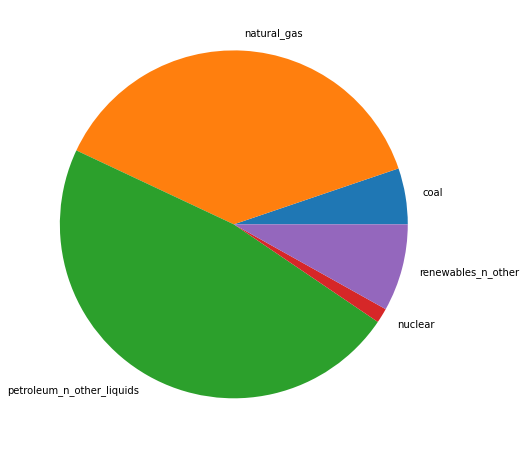

In [16]:
f = plt.figure(figsize = (11, 8))

plt.pie(year_2019.Energy_consumption, labels = year_2019.Energy_type)

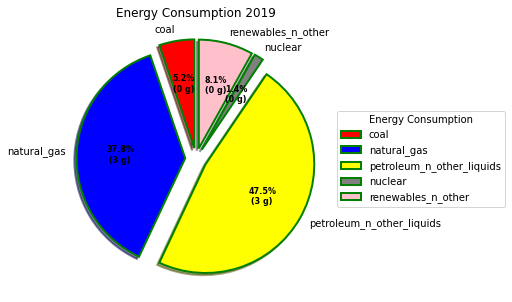

In [17]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(year_2019.Energy_consumption,
                                  autopct = lambda pct: func(pct, year_2019.Energy_consumption),
                                  labels = year_2019.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, year_2019.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 2019")
 
# show plot
plt.show()

<h2>1980-2019 Consumption </h2>

In [18]:
total_energy_consumption = mexico_df.copy()

In [19]:
pie_chart_tec = total_energy_consumption.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()

In [20]:
pie_chart_tec.drop(pie_chart_tec[(pie_chart_tec['Energy_type'] == 'all_energy_types')].index, inplace = True)

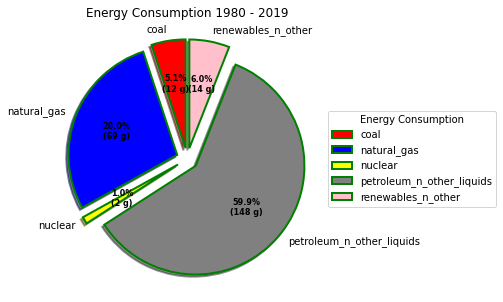

In [21]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(pie_chart_tec.Energy_consumption,
                                  autopct = lambda pct: func(pct, pie_chart_tec.Energy_consumption),
                                  labels = pie_chart_tec.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, pie_chart_tec.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 1980 - 2019")
 
# show plot
plt.show()

In [ ]:
#Joining year and population together to create the column year_population
mexico_df['year_population'] = mexico_df[['Year', 'Population']].apply(lambda x: ' - '.join(x.values.astype(str)), axis = 'columns')

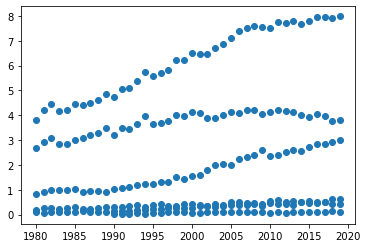

In [23]:
plt.scatter(mexico_df['Year'], mexico_df['Energy_consumption'] )

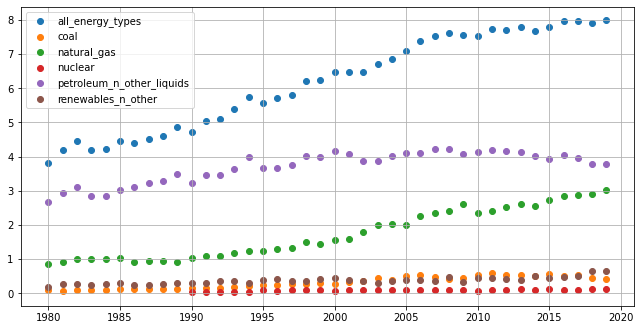

In [24]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))

for a,(b,c) in enumerate(mexico_df.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label = b)
    
axes.legend()
axes.grid(True)
plt.show()

<h1>Simple Linear Regression</h1>

<h2>Coal</h2>

<h3>Regression on Population and Energy_consumption</h3>

In [94]:
coal = mexico_df[mexico_df.Energy_type == 'coal']

In [72]:
x = np.array(coal.Population).reshape((-1,1))
y = np.array(coal.Energy_consumption)

In [74]:
lr_model = LinearRegression().fit(x,y)

In [75]:
y_pred = lr_model.predict(x)

In [79]:
r_squared = lr_model.score(x,y)
print(f'Coeficient of Determination: {r_squared}')

Coeficient of Determination: 0.8797551313231595


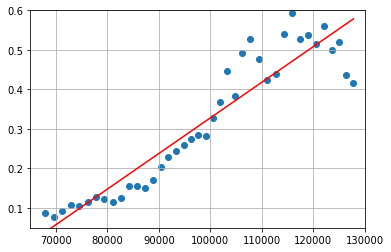

In [93]:
plt.scatter(coal.Population, coal.Energy_consumption)
plt.grid(True)
plt.xlim(65000, 130000)
plt.ylim(0.05, 0.6)

plt.plot(x, y_pred, color = 'red')
plt.show()

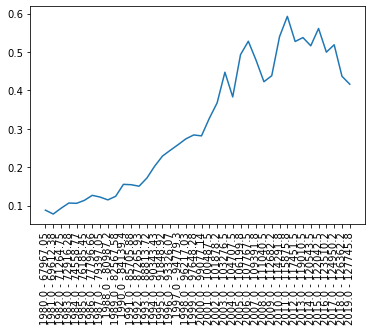

In [27]:
plt.plot(coal.year_population, coal.Energy_consumption)
plt.xticks(rotation = 90)

plt.show()